Train Dataset: Dataset({
    features: ['image', 'label'],
    num_rows: 33984
})


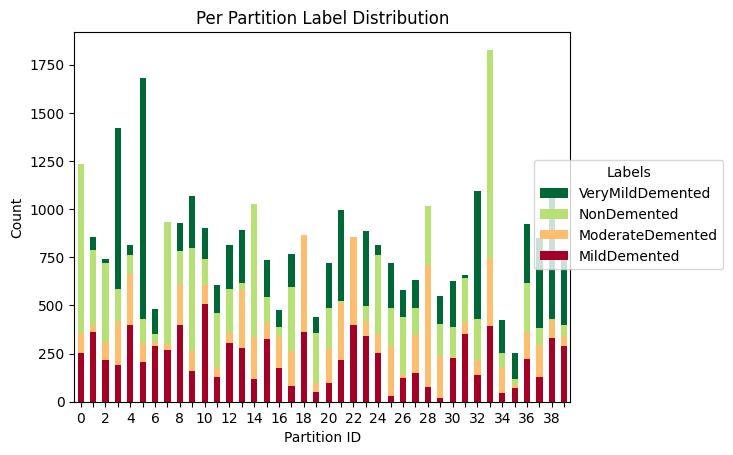

In [3]:
from datasets import load_dataset
from flwr_datasets.partitioner import IidPartitioner, DirichletPartitioner

# Constants
FOLDER = "../total_dataset"
NUM_PARTITIONS = 40
IMG_HEIGHT = 208
IMG_WIDTH = 176

dataset_dict = load_dataset("imagefolder", data_dir=FOLDER)
trainset = dataset_dict["train"]
print("Train Dataset:", trainset)

# Initialize partitioner
partitioner = DirichletPartitioner(num_partitions=NUM_PARTITIONS, partition_by="label",
                                    alpha=1.5, min_partition_size=10,
                                    self_balancing=True, shuffle=True)

#partitioner = IidPartitioner(num_partitions=30)
partitioner.dataset = trainset

#partition_1 = partitioner.load_partition(0)

from flwr_datasets.visualization import plot_label_distributions

figure, axis, dataframe = plot_label_distributions(
    partitioner=partitioner,
    label_name="label",
    legend=True,
    verbose_labels=True,
)
# Create and save partitions
# for i in range(NUM_PARTITIONS):
#     partition = partitioner.load_partition(i)
#     print(f"Partition {i} size: {len(partition)}")
#     # Uncomment below if you need to save partitions
#     partition.save_to_disk(f"./partitions-10/partition_{i}")
#     print(f"Partition {i} saved")
